<h1>Sound classification using ANN and mfcc<h1>

<h4>    we will be using module called "librosa" for feature extraction (mfcc)</h4>

In [1]:
import librosa
import librosa.display
import IPython.display as ipd

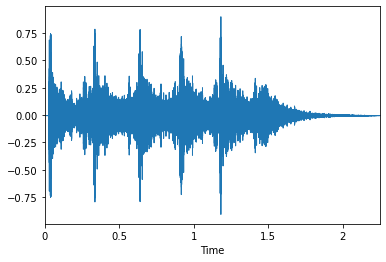

In [2]:
#sample checking if it is working properly

fname='F:/audioclassification/UrbanSound8K/audio/fold1/7061-6-0-0.wav'
data,s_rate=librosa.load(fname);
librosa.display.waveplot(data,sr=s_rate);
ipd.Audio(fname)

In [21]:
s_rate

22050

<h2>Getting the dataset</h2>

Download a copy of the UrbanSounds8K dataset from the UrbanSound8K home page.

Make sure to uncompress the dataset root directory into the project root, you should end up with a directory like "UrbanSounds8K" (or a symbolic link to it) in the project root.

<h2> Install required libraries</h2>
Make sure that Tensorflow, Keras, LibROSA, IPython, NumPy, Pandas, Matplotlib and SciKit Learn are already installed in your environment.

Note that we are using Tensorflow as Keras back-end, you must set this in your ~/.keras/keras.json file, this is an example:

<h4>{<br>
    "image_dim_ordering": "tf",<br>
    "image_data_format": "channels_first",<br>
    "epsilon": 1e-07,<br>
    "floatx": "float32",<br>
    "backend": "tensorflow"<br>
}</h4>
<h2>The UrbanSound8K dataset</h2>
The UrbanSound8K dataset is a compilation of urban sound recordings, classified in 10 categories according to the paper "A Dataset and Taxonomy for Urban Sound Research", which proposes a taxonomical categorization to describe different environmental sound types.

The UrbanSound8K dataset contains 8732 labeled sound slices of varying duration up to 4 seconds. The categorization labels being:<br>

 0:Air Conditioner<Br>
 1:Car Horn<Br>
 2:Children Playing<Br>
 3:Dog bark<Br>
 4:Drilling<Br>
 5:Engine Idling<Br>
 6:Gun Shot<Br>
 7:Jackhammer<Br>
 8:Siren<Br>
 9:Street Music<Br>
Note that the dataset comes already organized in 10 validation folds. In the case we want to compare our results with other we should stick with this schema.<Br>

<h3>Dataset metadata</h3>
The included metadata file ("UrbanSound8K/metadata/metadata.csv") provides all the required information about each audio file:

slice_file_name: The name of the audio file.<Br>
fsID: The Freesound ID of the recording from which this excerpt (slice) is taken<Br>
start: The start time of the slice in the original Freesound recording<Br>
end: The end time of slice in the original Freesound recording<Br>
salience: A (subjective) salience rating of the sound. 1 = foreground, 2 = background.<Br>
fold: The fold number (1-10) to which this file has been allocated.<Br>
classID: A numeric identifier of the sound class.<Br>
class: The class label name.

In [3]:
import pandas as pd

metadata=pd.read_csv("F:/audioclassification/UrbanSound8K/metadata/UrbanSound8K.csv")

In [4]:
metadata[metadata['classID']==8]

slice_file_name    fsID       start         end  salience  fold  \
114   102853-8-0-0.wav  102853    0.000000    4.000000         2     7   
115   102853-8-0-1.wav  102853    0.500000    4.500000         2     7   
116   102853-8-0-2.wav  102853    1.000000    5.000000         2     7   
117   102853-8-0-3.wav  102853    1.500000    5.500000         2     7   
118   102853-8-0-4.wav  102853    2.000000    6.000000         2     7   
...                ...     ...         ...         ...       ...   ...   
8574   96657-8-0-1.wav   96657  122.837051  126.837051         2     8   
8575   96657-8-0-2.wav   96657  123.337051  127.337051         2     8   
8576   96657-8-0-3.wav   96657  123.837051  127.837051         2     8   
8642   98525-8-0-0.wav   98525    0.000000    4.000000         1     7   
8643   98536-8-0-0.wav   98536    0.000000    1.358367         1     8   

      classID  class  
114         8  siren  
115         8  siren  
116         8  siren  
117         8  siren  
118         8  siren  
...       ...    ...  
8574        8  siren  
8575        8  siren  
8576        8  siren  
8642        8  siren  
8643        8  siren  

[929 rows x 8 columns]

In [5]:
metadata.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

In [6]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

In [7]:
#feature extraction using librosa inbuilt mfcc funtions

def features_extract(file):
    audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled

In [11]:
features=[]

for index,row in tqdm(metadata.iterrows()):
    fname=os.path.join(os.path.abspath('F:/audioclassification/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    class_label =row['class']
    data=features_extract(fname)
    features.append([data,class_label])
    
fdf=pd.DataFrame(features,columns=['feature','class_label'])

3555it [10:52,  6.29it/s]C:\Users\HP\anaconda3\envs\cv\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [24:11,  9.06it/s]C:\Users\HP\anaconda3\envs\cv\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [24:12, 13.94it/s]C:\Users\HP\anaconda3\envs\cv\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [25:13,  5.77it/s]


In [12]:
fdf

feature       class_label
0     [-215.79301, 71.66612, -131.81377, -52.091328,...          dog_bark
1     [-424.68677, 110.56227, -54.148235, 62.01074, ...  children_playing
2     [-459.56467, 122.800354, -47.92471, 53.265694,...  children_playing
3     [-414.55377, 102.896904, -36.66495, 54.18041, ...  children_playing
4     [-447.397, 115.0954, -53.809113, 61.608585, 1....  children_playing
...                                                 ...               ...
8727  [-399.2257, 136.81903, -51.964222, 37.023987, ...          car_horn
8728  [-346.72733, 87.48847, -46.265022, 52.748833, ...          car_horn
8729  [-304.61316, 112.6199, -47.161945, 37.00349, -...          car_horn
8730  [-344.71423, 126.75813, -56.17717, 36.070927, ...          car_horn
8731  [-315.93384, 95.67589, -38.047768, 47.50074, -...          car_horn

[8732 rows x 2 columns]

In [17]:
#convert the features to numpy array

x=np.array(fdf['feature'].tolist())
y=np.array(fdf['class_label'].tolist())

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape

(6985, 40)

In [24]:
x_test.shape

(1747, 40)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

num_labels=y.shape[1]

<h3>Its a simple sequential model with three fiden layes</h3>

In [103]:
model = Sequential()

model.add(Dense(256,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
          
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [104]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               10496     
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)              

In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs =20
num_batch=32

model.fit(x_train,y_train,batch_size=num_batch,epochs=num_epochs)

print("Finished")

Epoch 1/20
219/219 [==============================] - 1s 6ms/step - loss: 0.5232 - accuracy: 0.8185
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.4977 - accuracy: 0.8269
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.4719 - accuracy: 0.8365
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.4598 - accuracy: 0.8408
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.4396 - accuracy: 0.8533
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.4469 - accuracy: 0.8488
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.4126 - accuracy: 0.8594
Epoch 8/20
219/219 [==============================] - 2s 10ms/step - loss: 0.4248 - accuracy: 0.8531
Epoch 9/20
219/219 [==============================] - 2s 10ms/step - loss: 0.4158 - accuracy: 0.8517
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.4006 - accuracy: 0.

In [107]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[0])

0.41279056668281555


<h4>Let's test a sample from class 3 </h4>

In [108]:
fname='F:/audioclassification/UrbanSound8K/audio/fold5/100032-3-0-0.wav'
pf=features_extract(fname)
pf=pf.reshape(1,-1)
t=model.predict_classes(pf)
print(t[0])

3


And we got the answer correct

<h2>But our main goal is to identify the siren sound from the others so lets check it:</h2>

In [109]:
ans=0
tot=0
t=0
for index,row in tqdm(metadata.iterrows()):
    #print(row['classID'])
    if row['classID']==8:
        fname=os.path.join(os.path.abspath('F:/audioclassification/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
        pf=features_extract(fname)
        pf=pf.reshape(1,-1)
        t=model.predict_classes(pf)
        tot+=1
        if(t==8):
            ans+=1

8732it [03:32, 41.19it/s] 


In [110]:
print(tot)
print(ans)

929
907


As we can see we achieved an accuracy of ~97.63 % when tested for the siren sound
But the overall accuracy for the model is 88.7 which is neither too good nor bad.

In [111]:
model.save('F:/audioclassification/UrbanSound8K/saved_model/test4.h5')

Save the model and use it in the python app
